In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf 
from sklearn.metrics import r2_score,mean_squared_error


In [2]:
df=pd.read_csv('Clean_Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [6]:
df.shape

(300153, 12)

In [7]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

# price

In [10]:
df.price.value_counts()

54608    1445
2339     1442
54684    1390
60978    1383
60508    1230
         ... 
12014       1
26912       1
20145       1
25462       1
7533        1
Name: price, Length: 12157, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

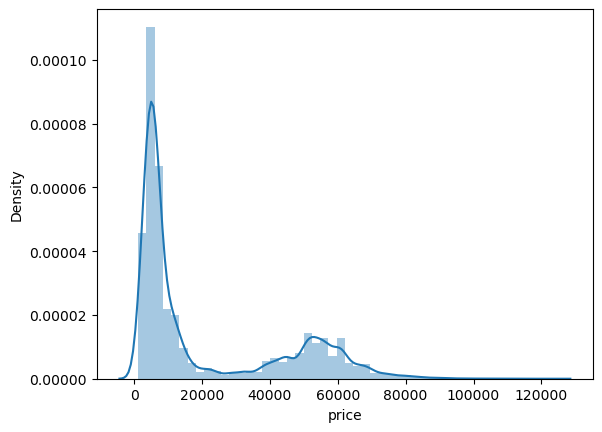

In [11]:
sns.distplot(df.price)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

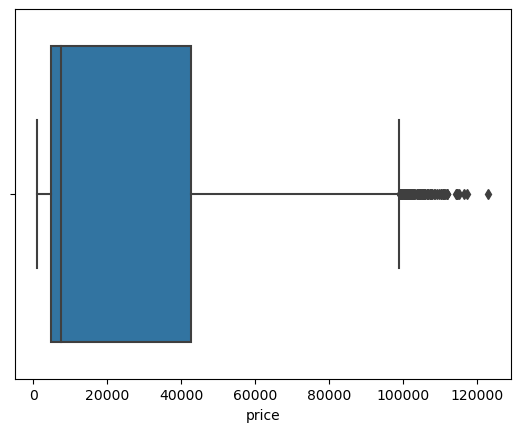

In [12]:
sns.boxplot(df.price)

In [13]:
q3=df.price.quantile(0.75)
q1=df.price.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df.price=np.where(df.price>upper,upper,df.price)
df.price=np.where(df.price<lower,lower,df.price)


C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

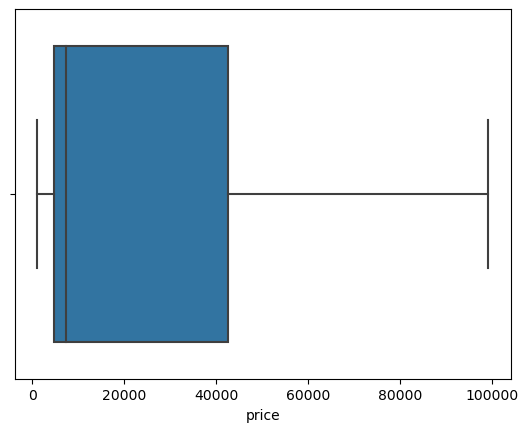

In [14]:
sns.boxplot(df.price)

# airline

In [15]:
df.airline.value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline', ylabel='count'>

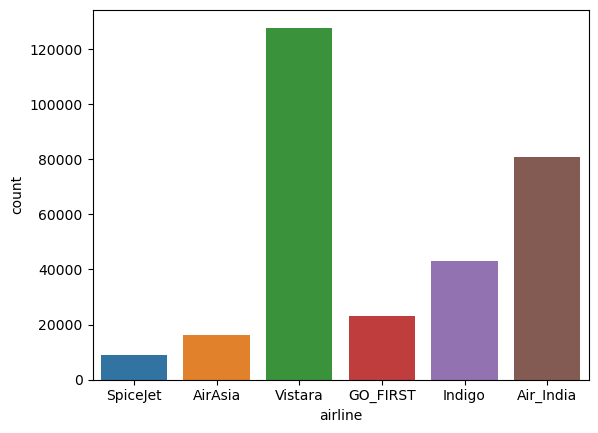

In [16]:
sns.countplot(df.airline)

In [17]:
import statsmodels.api as sm

model=ols('price~airline',data=df).fit()
anova=sm.stats.anova_lm(model,type=2)
print(anova)

                df        sum_sq       mean_sq             F  PR(>F)
airline        5.0  3.441762e+13  6.883524e+12  17202.225234     0.0
Residual  300147.0  1.201048e+14  4.001531e+08           NaN     NaN


In [18]:
tuk=pairwise_tukeyhsd(df.price,df.airline,alpha=0.5)
print(tuk)

         Multiple Comparison of Means - Tukey HSD, FWER=0.50         
  group1    group2    meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------------
  AirAsia Air_India  19415.9464    0.0  19114.2222  19717.6705   True
  AirAsia  GO_FIRST   1560.9349    0.0   1202.2242   1919.6455   True
  AirAsia    Indigo   1233.1436    0.0    910.2295   1556.0576   True
  AirAsia  SpiceJet   2088.2061    0.0   1628.2381   2548.1741   True
  AirAsia   Vistara  26300.1619    0.0  26007.7802  26592.5435   True
Air_India  GO_FIRST -17855.0115    0.0 -18115.5032 -17594.5199   True
Air_India    Indigo -18182.8028    0.0 -18391.2639 -17974.3417   True
Air_India  SpiceJet -17327.7402    0.0 -17716.0096 -16939.4708   True
Air_India   Vistara   6884.2155    0.0   6727.1499   7041.2811   True
 GO_FIRST    Indigo   -327.7913 0.3354   -612.5577    -43.0249   True
 GO_FIRST  SpiceJet    527.2713 0.2752     93.2333    961.3093   True
 GO_FIRST   Vistara 

# flight

In [19]:
df.flight.value_counts()

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='flight', ylabel='count'>

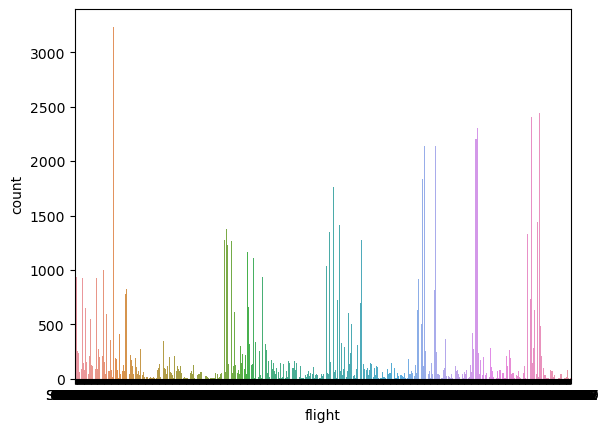

In [20]:
sns.countplot(df.flight)

In [21]:
df.drop('flight',axis=1,inplace=True)

# source_city

In [22]:
df.source_city.value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='source_city', ylabel='count'>

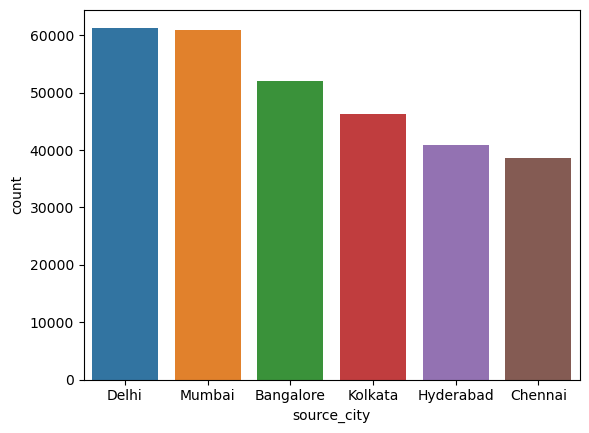

In [23]:
sns.countplot(df.source_city)

In [24]:
model=ols('price~source_city',data=df).fit()
anova=sm.stats.anova_lm(model,type=2)
print(anova)

                   df        sum_sq       mean_sq           F         PR(>F)
source_city       5.0  3.725370e+11  7.450739e+10  145.074236  2.474926e-154
Residual     300147.0  1.541498e+14  5.135812e+08         NaN            NaN


In [25]:
tuk=pairwise_tukeyhsd(df.price,df.source_city,alpha=0.5)
print(tuk)

       Multiple Comparison of Means - Tukey HSD, FWER=0.50        
  group1    group2   meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------
Bangalore   Chennai   523.1697 0.0077   257.3331   789.0062   True
Bangalore     Delhi -2520.0608    0.0 -2756.0827  -2284.039   True
Bangalore Hyderabad -1313.7438    0.0  -1575.616 -1051.8717   True
Bangalore   Kolkata   272.5463 0.4125    19.6019   525.4906   True
Bangalore    Mumbai    12.6167    1.0  -223.8025   249.0359  False
  Chennai     Delhi -3043.2305    0.0 -3300.3483 -2786.1127   True
  Chennai Hyderabad -1836.9135    0.0 -2117.9478 -1555.8793   True
  Chennai   Kolkata  -250.6234 0.5945  -523.3579     22.111  False
  Chennai    Mumbai  -510.5529  0.007  -768.0355  -253.0703   True
    Delhi Hyderabad   1206.317    0.0   953.3002  1459.3338   True
    Delhi   Kolkata  2792.6071    0.0  2548.8422   3036.372   True
    Delhi    Mumbai  2532.6776    0.0  2306.1063  2759.2488   

In [26]:
df.source_city.replace({'Mumbai':'Bangalore'},inplace=True)

In [27]:
tuk=pairwise_tukeyhsd(df.price,df.source_city,alpha=0.5)
print(tuk)

       Multiple Comparison of Means - Tukey HSD, FWER=0.50        
  group1    group2   meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------
Bangalore   Chennai   516.3679  0.001   303.3496   729.3862   True
Bangalore     Delhi -2526.8626    0.0 -2708.2501 -2345.4751   True
Bangalore Hyderabad -1320.5456    0.0 -1529.4296 -1111.6617   True
Bangalore   Kolkata   265.7445  0.209    66.2441   465.2449   True
  Chennai     Delhi -3043.2305    0.0 -3278.0062 -2808.4548   True
  Chennai Hyderabad -1836.9135    0.0 -2093.5274 -1580.2996   True
  Chennai   Kolkata  -250.6234 0.4934  -499.6587    -1.5881   True
    Delhi Hyderabad   1206.317    0.0   975.2859   1437.348   True
    Delhi   Kolkata  2792.6071    0.0   2570.024  3015.1902   True
Hyderabad   Kolkata  1586.2901    0.0  1340.7818  1831.7984   True
------------------------------------------------------------------


# departure_time

In [28]:
df.departure_time.value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='departure_time', ylabel='count'>

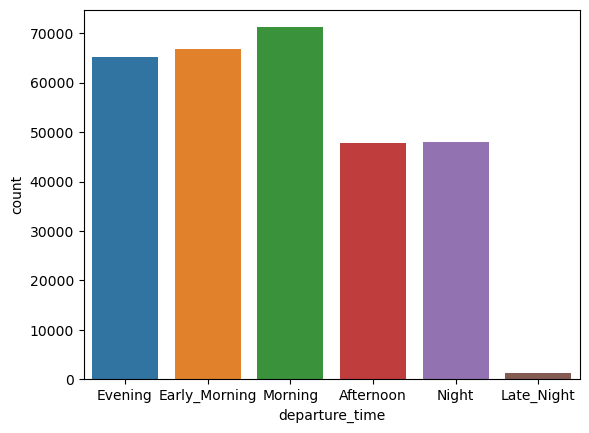

In [29]:
sns.countplot(df.departure_time)

In [30]:
model=ols('price~departure_time',data=df).fit()
anova=sm.stats.anova_lm(model,type=2)

print(anova)

                      df        sum_sq       mean_sq           F  PR(>F)
departure_time       5.0  8.174463e+11  1.634893e+11  319.253324     0.0
Residual        300147.0  1.537049e+14  5.120988e+08         NaN     NaN


In [31]:
tuk=pairwise_tukeyhsd(df.price,df.departure_time,alpha=0.5)
print(tuk)

             Multiple Comparison of Means - Tukey HSD, FWER=0.50             
    group1        group2      meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------------------
    Afternoon Early_Morning   2190.1757    0.0   1953.2191   2427.1322   True
    Afternoon       Evening   3050.1464    0.0   2811.9119   3288.3808   True
    Afternoon    Late_Night  -8883.4128    0.0  -9992.6684  -7774.1572   True
    Afternoon       Morning   3448.7573    0.0    3214.846   3682.6686   True
    Afternoon         Night   4881.9203    0.0   4626.3695    5137.471   True
Early_Morning       Evening    859.9707    0.0    642.1468   1077.7946   True
Early_Morning    Late_Night -11073.5884    0.0 -12178.6402  -9968.5366   True
Early_Morning       Morning   1258.5817    0.0   1045.4947   1471.6687   True
Early_Morning         Night   2691.7446    0.0   2455.1061   2928.3831   True
      Evening    Late_Night -11933.5591    0.0 -13038.8857 -1082

# stops

In [32]:
df.stops.value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stops', ylabel='count'>

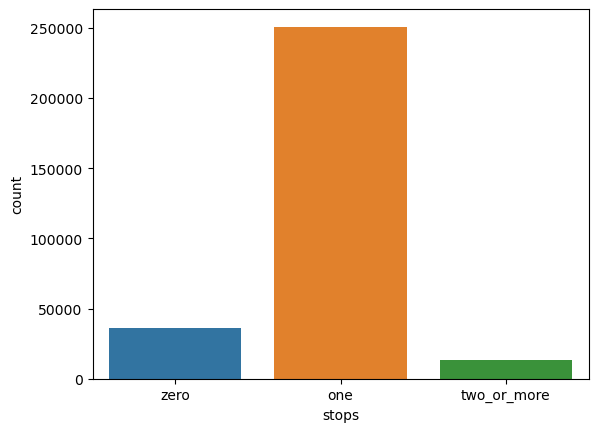

In [33]:
sns.countplot(df.stops)

In [34]:
model=ols('price~stops',data=df).fit()
anova=sm.stats.anova_lm(model,type=2)
print(anova)

                df        sum_sq       mean_sq            F  PR(>F)
stops          2.0  6.397948e+12  3.198974e+12  6482.199357     0.0
Residual  300150.0  1.481244e+14  4.935014e+08          NaN     NaN


In [35]:
tuk=pairwise_tukeyhsd(df.price,df.stops,alpha=0.5)
print(tuk)

          Multiple Comparison of Means - Tukey HSD, FWER=0.50           
   group1      group2     meandiff  p-adj    lower       upper    reject
------------------------------------------------------------------------
        one two_or_more  -8797.7633  -0.0  -9019.8031  -8575.7236   True
        one        zero -13523.0018  -0.0 -13663.5639 -13382.4397   True
two_or_more        zero  -4725.2385  -0.0   -4978.418   -4472.059   True
------------------------------------------------------------------------


# arrival_time

In [36]:
df.arrival_time.value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='arrival_time', ylabel='count'>

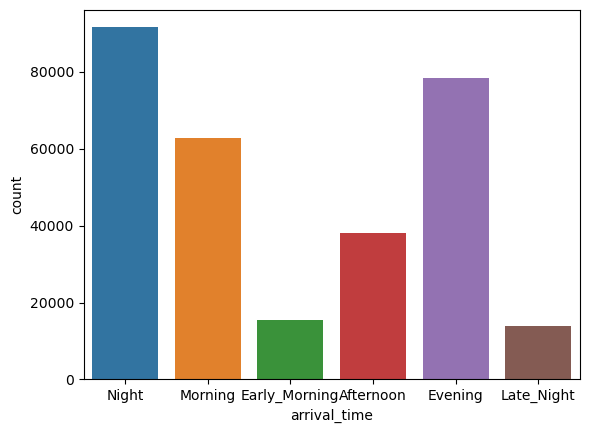

In [37]:
sns.countplot(df.arrival_time)

In [38]:
model=ols('price~arrival_time',data=df).fit()
anova=sm.stats.anova_lm(model,type=2)
print(anova)

                    df        sum_sq       mean_sq            F  PR(>F)
arrival_time       5.0  2.566016e+12  5.132032e+11  1013.688328     0.0
Residual      300147.0  1.519564e+14  5.062731e+08          NaN     NaN


In [39]:
tuk=pairwise_tukeyhsd(df.price,df.arrival_time,alpha=0.5)
print(tuk)

            Multiple Comparison of Means - Tukey HSD, FWER=0.50             
    group1        group2      meandiff  p-adj    lower       upper    reject
----------------------------------------------------------------------------
    Afternoon Early_Morning  -3501.0078   0.0  -3876.3126  -3125.7029   True
    Afternoon       Evening   4547.6139   0.0   4302.0709   4793.1569   True
    Afternoon    Late_Night  -7208.5874   0.0  -7597.1724  -6820.0024   True
    Afternoon       Morning    3736.186   0.0   3480.8484   3991.5236   True
    Afternoon         Night   3090.1804   0.0    2850.512   3329.8488   True
Early_Morning       Evening   8048.6217   0.0   7702.1382   8395.1052   True
Early_Morning    Late_Night  -3707.5796   0.0  -4166.6632   -3248.496   True
Early_Morning       Morning   7237.1938   0.0   6883.7016    7590.686   True
Early_Morning         Night   6591.1882   0.0   6248.8427   6933.5337   True
      Evening    Late_Night -11756.2013   0.0 -12117.0273 -11395.3753   True

# destination_city

In [40]:
df.destination_city.value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='destination_city', ylabel='count'>

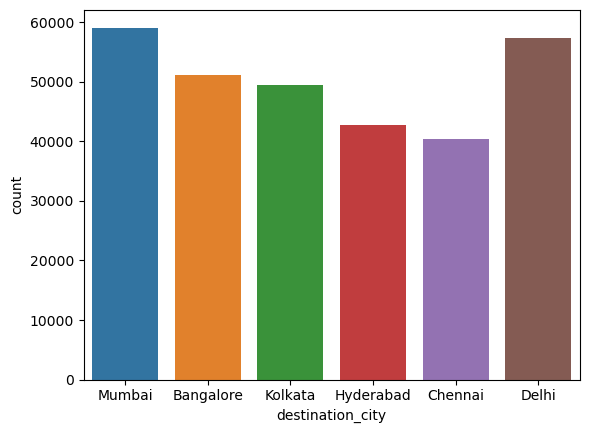

In [41]:
sns.countplot(df.destination_city)

In [42]:
model=ols('price~destination_city',data=df).fit()
anova=sm.stats.anova_lm(model,type=2)
print(anova)

                        df        sum_sq       mean_sq           F  \
destination_city       5.0  4.956858e+11  9.913716e+10  193.185491   
Residual          300147.0  1.540267e+14  5.131709e+08         NaN   

                         PR(>F)  
destination_city  3.088843e-206  
Residual                    NaN  


In [43]:
tuk=pairwise_tukeyhsd(df.price,df.destination_city,alpha=0.5)
print(tuk)

       Multiple Comparison of Means - Tukey HSD, FWER=0.50        
  group1    group2   meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------
Bangalore   Chennai   360.3143 0.1602    96.6394   623.9892   True
Bangalore     Delhi   -3156.92    0.0 -3397.7968 -2916.0432   True
Bangalore Hyderabad -1165.5761    0.0 -1425.1555  -905.9967   True
Bangalore   Kolkata   365.4634 0.1078   115.7853   615.1415   True
Bangalore    Mumbai  -221.3595  0.587  -460.5632    17.8442  False
  Chennai     Delhi -3517.2343    0.0 -3774.4453 -3260.0233   True
  Chennai Hyderabad -1525.8905    0.0 -1800.6946 -1251.0863   True
  Chennai   Kolkata      5.149    1.0  -260.3223   270.6204  False
  Chennai    Mumbai  -581.6739  0.001  -837.3187   -326.029   True
    Delhi Hyderabad  1991.3439    0.0   1738.333  2244.3548   True
    Delhi   Kolkata  3522.3834    0.0  3279.5415  3765.2253   True
    Delhi    Mumbai  2935.5605    0.0  2703.5013  3167.6196   

In [44]:
df.destination_city.replace({'Mumbai':'Bangalore','Kolkata':'Chennai'},inplace=True)

In [45]:
tuk=pairwise_tukeyhsd(df.price,df.destination_city,alpha=0.5)
print(tuk)

       Multiple Comparison of Means - Tukey HSD, FWER=0.50       
  group1    group2   meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------------
Bangalore   Chennai   481.8976   0.0     339.47   624.3253   True
Bangalore     Delhi -3038.1737   0.0 -3201.3385 -2875.0089   True
Bangalore Hyderabad -1046.8298   0.0 -1227.4375  -866.2222   True
  Chennai     Delhi -3520.0713   0.0 -3689.4151 -3350.7276   True
  Chennai Hyderabad -1528.7275   0.0 -1714.9361 -1342.5188   True
    Delhi Hyderabad  1991.3439   0.0  1788.8327  2193.8551   True
-----------------------------------------------------------------


# class

In [46]:
df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

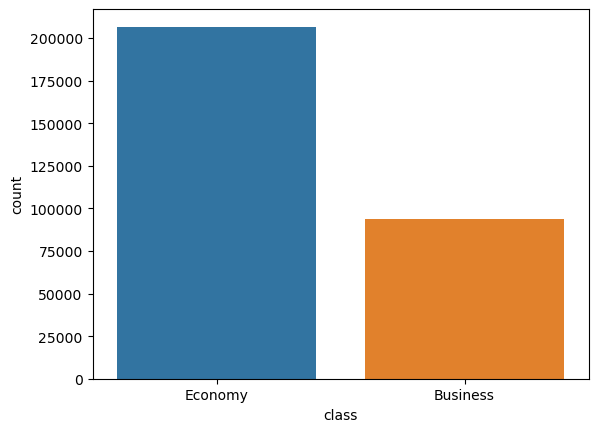

In [47]:
sns.countplot(df['class'])

# duration

In [48]:
df.duration.value_counts()

2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: duration, Length: 476, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

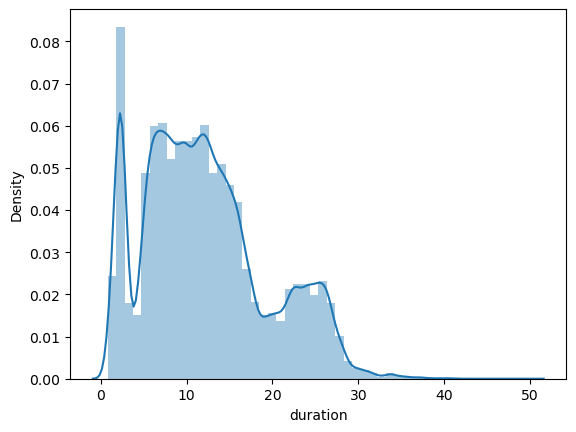

In [49]:
sns.distplot(df.duration)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

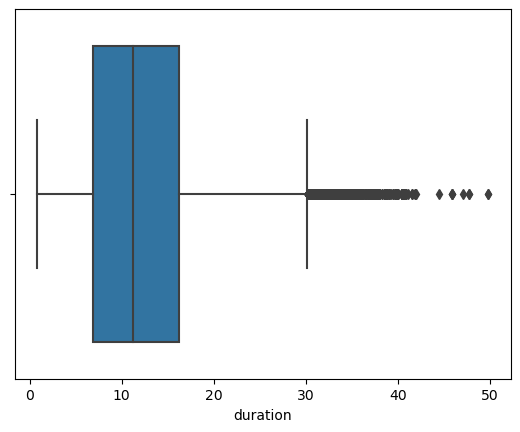

In [50]:
sns.boxplot(df.duration)

In [51]:
q3=df.duration.quantile(0.75)
q1=df.duration.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
df.duration=np.where(df.duration>upper,upper,df.duration)
df.duration=np.where(df.duration<lower,lower,df.duration)


C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

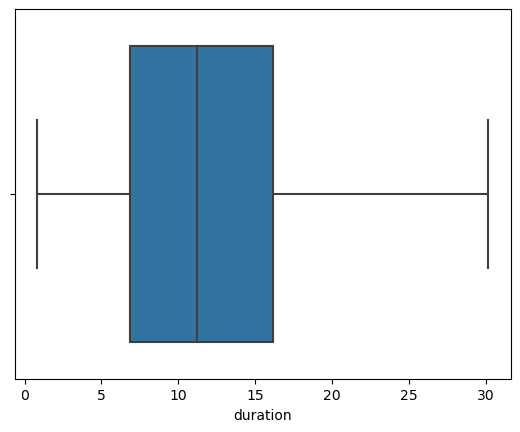

In [52]:
sns.boxplot(df.duration)

# days_left

In [53]:
df.days_left.value_counts()

25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: days_left, dtype: int64

In [54]:
df.days_left.nunique()

49

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_left', ylabel='Density'>

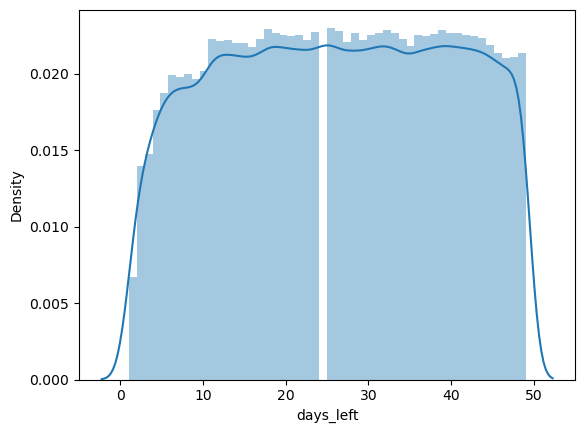

In [55]:
sns.distplot(df.days_left)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_left'>

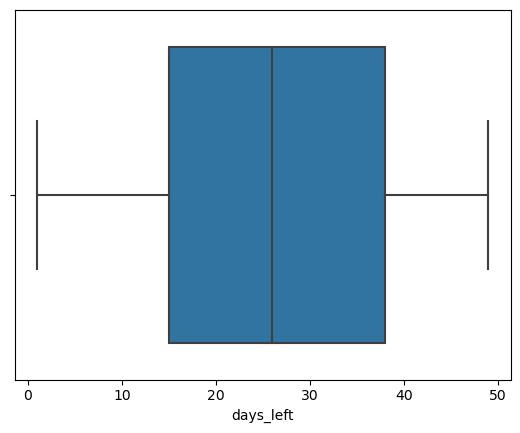

In [56]:
sns.boxplot(df.days_left)

In [57]:
numeric=df.select_dtypes('number')

In [58]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   duration   300153 non-null  float64
 1   days_left  300153 non-null  int64  
 2   price      300153 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 6.9 MB


<AxesSubplot:>

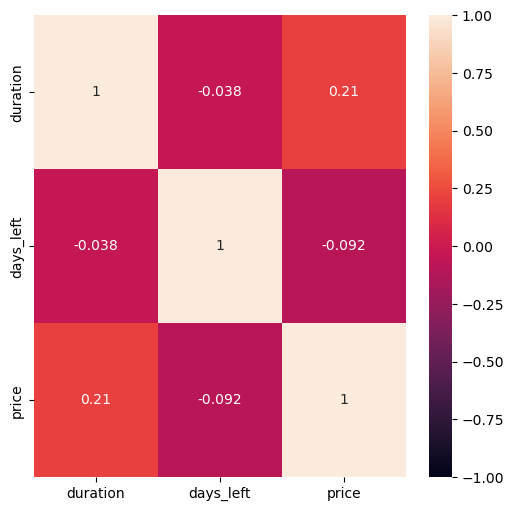

In [59]:
plt.figure(figsize=(6,6))

sns.heatmap(numeric.corr(),annot=True,vmin=-1,vmax=1)

In [60]:

from sklearn.preprocessing import LabelEncoder

In [61]:
le = LabelEncoder()
df['class']= le.fit_transform(df['class'])


In [62]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Bangalore,1,2.17,1,5953.0
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Bangalore,1,2.33,1,5953.0
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Bangalore,1,2.17,1,5956.0
3,Vistara,Delhi,Morning,zero,Afternoon,Bangalore,1,2.25,1,5955.0
4,Vistara,Delhi,Morning,zero,Morning,Bangalore,1,2.33,1,5955.0


In [63]:
x=df.drop('price',axis=1)

In [64]:
y=df['price']

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [66]:
xdum=pd.get_dummies(x.airline,drop_first=True)
q=pd.get_dummies(x.source_city,drop_first=True)
w=pd.get_dummies(x.departure_time,drop_first=True)
e=pd.get_dummies(x.stops,drop_first=True)
r=pd.get_dummies(x.arrival_time,drop_first=True)
t=pd.get_dummies(x.destination_city,drop_first=True)

In [67]:
x=pd.concat([x,xdum,q,w,e,r,t],axis=1)

In [68]:
x.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,Air_India,...,two_or_more,zero,Early_Morning,Evening,Late_Night,Morning,Night,Chennai,Delhi,Hyderabad
0,SpiceJet,Delhi,Evening,zero,Night,Bangalore,1,2.17,1,0,...,0,1,0,0,0,0,1,0,0,0
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Bangalore,1,2.33,1,0,...,0,1,0,0,0,1,0,0,0,0
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Bangalore,1,2.17,1,0,...,0,1,1,0,0,0,0,0,0,0
3,Vistara,Delhi,Morning,zero,Afternoon,Bangalore,1,2.25,1,0,...,0,1,0,0,0,0,0,0,0,0
4,Vistara,Delhi,Morning,zero,Morning,Bangalore,1,2.33,1,0,...,0,1,0,0,0,1,0,0,0,0


In [69]:
dr=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city']


In [70]:
x.drop(dr,axis=1,inplace=True)

In [71]:
x.head()

,class,duration,days_left,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Chennai,Delhi,...,two_or_more,zero,Early_Morning,Evening,Late_Night,Morning,Night,Chennai,Delhi,Hyderabad
0,1,2.17,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,1,2.33,1,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,1,2.17,1,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
3,1,2.25,1,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,2.33,1,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0


In [72]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [73]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [74]:
pred=lr.predict(xtest)

In [75]:
print(lr.intercept_)

52491.619372221845


In [76]:
print('R-square',round(lr.score(x,y),3))

R-square 0.911


In [77]:
r2_score(ytest,pred)

0.9125071322775633

In [78]:
from sklearn import metrics

In [79]:
print("MAE:", metrics.mean_absolute_error(ytest, pred))
print('MSE:', metrics.mean_squared_error(ytest, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, pred)))

MAE: 4544.78084537023
MSE: 45032015.6816818
RMSE: 6710.589816229405


C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

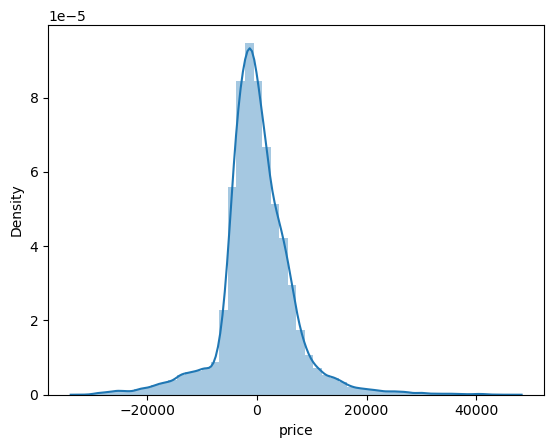

In [80]:
sns.distplot(ytest-pred)

C:\Users\abhay\AppData\Local\Temp\ipykernel_15824\2277819080.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([ytrain.min(),ytrain.max()],[ytrain.min(),ytrain.max()],'k--',c='blue',lw=3)


Text(0, 0.5, 'Predicted')

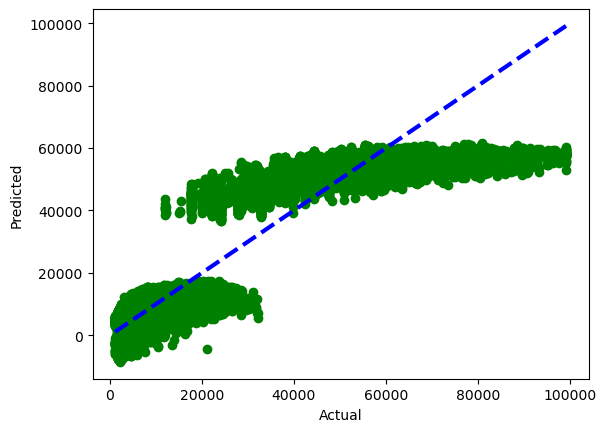

In [81]:
plt.scatter(ytest,pred,c='green')
plt.plot([ytrain.min(),ytrain.max()],[ytrain.min(),ytrain.max()],'k--',c='blue',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

In [83]:
dt=DecisionTreeRegressor(max_depth=9)
dt.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=9)

In [84]:
r2_score(ytest,pred)

0.9125071322775633

In [85]:
y_pred=dt.predict(xtest)

In [86]:
dt.score(xtest,ytest)

0.9546764821859567

In [87]:
mse=mean_squared_error(ytest,y_pred)
mse

23327722.797084443

In [88]:
np.sqrt(mean_squared_error(ytest,y_pred))

4829.878134806761

In [89]:
dept=[8,9,10,11]
mse_train,mse_test=[],[]

for i in dept:
    prdct=DecisionTreeRegressor(max_depth=i)
    prdct.fit(xtrain,ytrain)
    y_train_pred=prdct.predict(xtrain)
    y_test_pred=prdct.predict(xtest)
    mse_train.append(mean_squared_error(ytrain,y_train_pred))
    mse_test.append(mean_squared_error(ytest, y_test_pred))

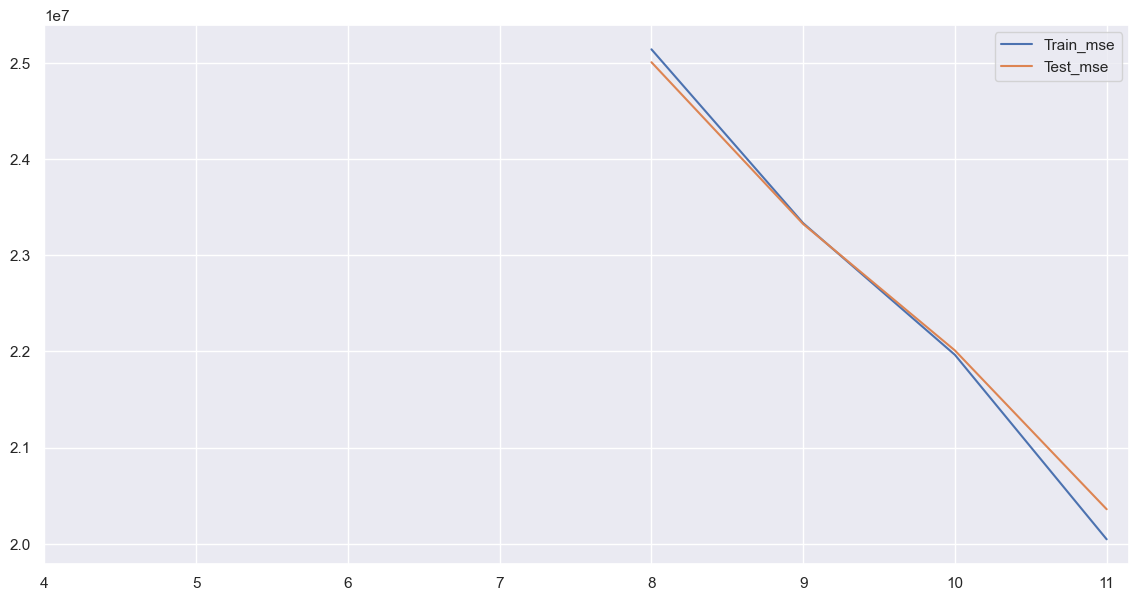

In [90]:
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=mse_train,x=dept,label='Train_mse')
sns.lineplot(y=mse_test,x=dept,label='Test_mse')
plt.xticks(ticks=np.arange(4,12,1))
plt.show()

In [91]:
x = sm.add_constant(xtrain) # Add a constant term to the independent variables


In [92]:
model = sm.OLS(ytrain, x).fit()

In [93]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 9.119e+04
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:28:19   Log-Likelihood:            -2.4584e+06
No. Observations:              240122   AIC:                         4.917e+06
Df Residuals:                  240094   BIC:                         4.917e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.249e+04     98.336    533.799      0.000    5.23e+04    5.27e+04
class         -4.489e+04     33.672  -1333.066      0.000    -4.5e+04   -4.48e+04
duration         41.2467      2.658     15.518      0.000      36.037      46.456
days_left      -131.3191      1.021   -128.674      0.000    -133.319    -129.319
Air_India        42.0244     70.333      0.598      0.550     -95.826     179.875
GO_FIRST       1715.0053     78.694     21.793      0.000    1560.767    1869.244
Indigo         2045.1753     72.082     28.373      0.000    1903.896    2186.454
SpiceJet       2324.4842    102.112     22.764      0.000    2124.348    2524.620
Vistara        3980.8586     68.246     58.331      0.000    3847.098    4114.619
Chennai         184.0837     45.479      4.048      0.000      94.947     273.221
Delhi         -1332.4195     39.646    -33.608      0.000   -1410.124   -1254.715
Hyderabad     -1533.4462     44.803    -34.226      0.000   -1621.260   -1445.633
Kolkata        1553.8295     42.873     36.243      0.000    1469.800    1637.859
Early_Morning   847.8449     46.227     18.341      0.000     757.240     938.450
Evening         748.3947     47.021     15.916      0.000     656.236     840.554
Late_Night     1898.2017    214.263      8.859      0.000    1478.252    2318.151
Morning         866.9884     45.239     19.165      0.000     778.322     955.655
Night           693.3142     51.019     13.589      0.000     593.318     793.310
two_or_more    2057.6058     69.289     29.696      0.000    1921.800    2193.411
zero          -7651.7826     51.662   -148.111      0.000   -7753.039   -7550.526
Early_Morning  -856.6455     74.060    -11.567      0.000   -1001.802    -711.489
Evening         991.0510     47.929     20.677      0.000     897.111    1084.991
Late_Night      940.2477     77.906     12.069      0.000     787.554    1092.942
Morning         472.0647     50.348      9.376      0.000     373.383     570.746
Night          1097.2478     46.922     23.384      0.000    1005.281    1189.215
Chennai         686.8121     35.301     19.456      0.000     617.623     756.001
Delhi         -1542.6762     40.912    -37.707      0.000   -1622.862   -1462.490
Hyderabad     -1643.2566     44.352    -37.050      0.000   -1730.186   -1556.327
==============================================================================
Omnibus:                    28961.610   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           228506.730
Skew:                           0.314   Prob(JB):                         0.00
Kurtosis:                       7.738   Cond. No.                         489.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

In [94]:
xtrain.drop(columns=['Air_India'],axis=1,inplace=True)

In [95]:
x = sm.add_constant(xtrain) # Add a constant term to the independent variables


In [96]:
model = sm.OLS(ytrain, x).fit()

In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 9.470e+04
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:28:20   Log-Likelihood:            -2.4584e+06
No. Observations:              240122   AIC:                         4.917e+06
Df Residuals:                  240095   BIC:                         4.917e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.253e+04     80.794    650.112      0.000    5.24e+04    5.27e+04
class         -4.489e+04     33.043  -1358.557      0.000    -4.5e+04   -4.48e+04
duration         41.5928      2.594     16.033      0.000      36.508      46.677
days_left      -131.3331      1.020   -128.722      0.000    -133.333    -129.333
GO_FIRST       1683.5341     58.469     28.794      0.000    1568.937    1798.131
Indigo         2013.9558     49.657     40.557      0.000    1916.630    2111.282
SpiceJet       2290.8759     85.223     26.881      0.000    2123.841    2457.911
Vistara        3945.1718     33.020    119.479      0.000    3880.454    4009.890
Chennai         184.1075     45.479      4.048      0.000      94.971     273.244
Delhi         -1333.2090     39.624    -33.647      0.000   -1410.870   -1255.548
Hyderabad     -1533.2359     44.802    -34.223      0.000   -1621.046   -1445.425
Kolkata        1553.0845     42.855     36.241      0.000    1469.090    1637.079
Early_Morning   848.2959     46.221     18.353      0.000     757.703     938.888
Evening         748.5183     47.020     15.919      0.000     656.360     840.676
Late_Night     1897.6081    214.260      8.857      0.000    1477.663    2317.553
Morning         868.0599     45.203     19.204      0.000     779.463     956.656
Night           692.6355     51.006     13.579      0.000     592.664     792.607
two_or_more    2053.8318     69.001     29.765      0.000    1918.592    2189.072
zero          -7649.5607     51.528   -148.454      0.000   -7750.555   -7548.567
Early_Morning  -858.5301     73.993    -11.603      0.000   -1003.555    -713.506
Evening         991.2287     47.928     20.682      0.000     897.291    1085.167
Late_Night      933.5323     77.091     12.109      0.000     782.436    1084.629
Morning         472.2362     50.347      9.380      0.000     373.556     570.916
Night          1097.8423     46.912     23.402      0.000    1005.896    1189.788
Chennai         686.4504     35.296     19.449      0.000     617.272     755.629
Delhi         -1543.2947     40.899    -37.735      0.000   -1623.455   -1463.134
Hyderabad     -1643.0985     44.352    -37.047      0.000   -1730.026   -1556.171
==============================================================================
Omnibus:                    28951.447   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           228319.944
Skew:                           0.314   Prob(JB):                         0.00
Kurtosis:                       7.736   Cond. No.                         489.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
res=ytest-y_pred

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

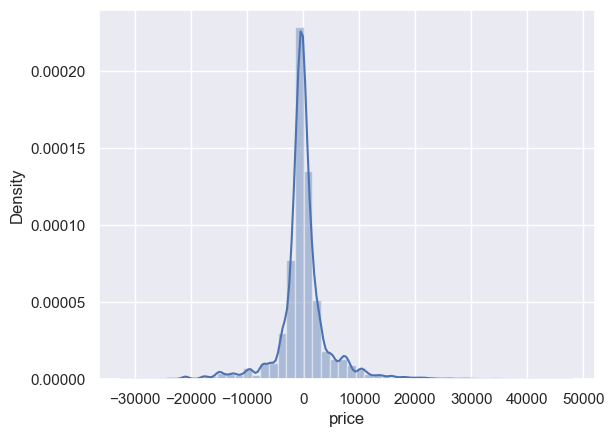

In [99]:
sns.distplot(res)

# ALL MODEL ARE GETTING 91% R-SQUARED